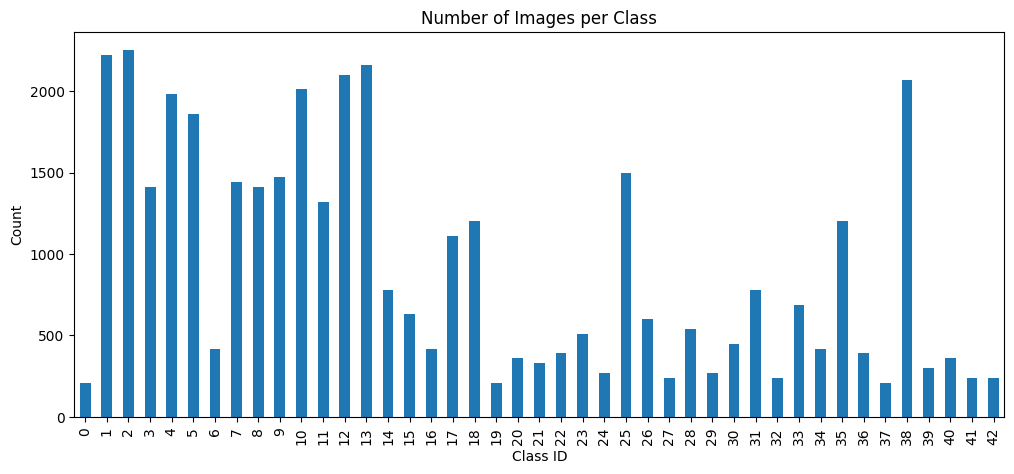

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Set your data path
data_dir = '../data'
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))

# See the distribution of classes
plt.figure(figsize=(12, 5))
train_df['ClassId'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Images per Class")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()

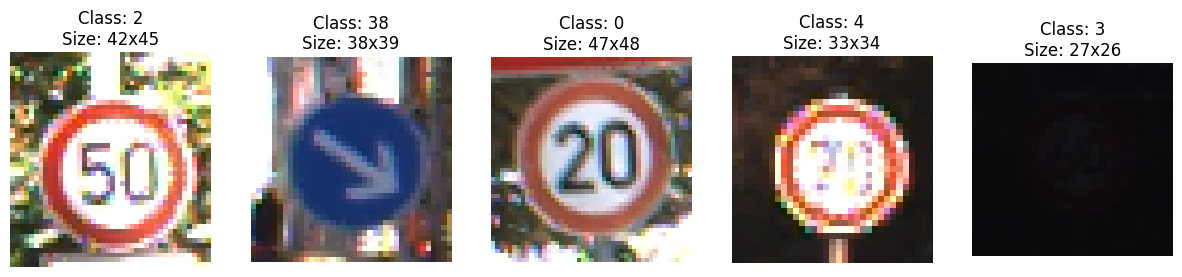

In [7]:
import random

def show_samples(df, data_path, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        # Pick a random row
        sample_row = df.sample(1).iloc[0]
        img_path = os.path.join(data_path, sample_row['Path'])
        
        # Load image (OpenCV loads BGR, so convert to RGB for matplotlib)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Class: {sample_row['ClassId']}\nSize: {sample_row['Width']}x{sample_row['Height']}")
        plt.axis('off')
    plt.show()

show_samples(train_df, data_dir)

In [3]:
# Calculate statistics for Width and Height
min_w, max_w = train_df['Width'].min(), train_df['Width'].max()
min_h, max_h = train_df['Height'].min(), train_df['Height'].max()

print(f"Image Widths range from {min_w} to {max_w}")
print(f"Image Heights range from {min_h} to {max_h}")

# Check how many unique classes you actually have (standard is 43: 0-42)
num_classes = train_df['ClassId'].nunique()
print(f"Total number of classes: {num_classes}")

Image Widths range from 25 to 243
Image Heights range from 25 to 225
Total number of classes: 43
